Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import tensorflow.python.keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin_Data_Set/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin_Data_Set/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

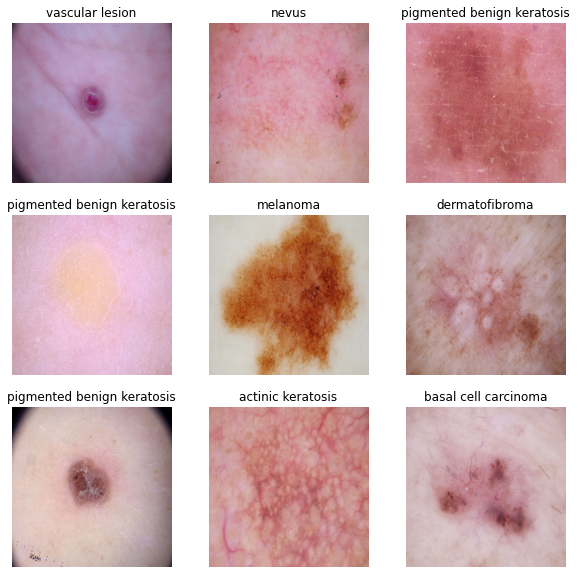

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D( filters=16, kernel_size=3, activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# # View the summary of all layers
model.build((32,180,180,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (32, 180, 180, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 178, 178, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 89, 89, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 87, 87, 32)          4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 43, 43, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 41, 41, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 20, 20, 64)          0

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 740s 3s/step - loss: 2.0064 - accuracy: 0.2537 - val_loss: 1.6107 - val_accuracy: 0.4586
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5690 - accuracy: 0.4587 - val_loss: 1.4866 - val_accuracy: 0.5101
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4491 - accuracy: 0.5095 - val_loss: 1.4670 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3311 - accuracy: 0.5306 - val_loss: 1.3512 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.1977 - accuracy: 0.5713 - val_loss: 1.3745 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.2116 - accuracy: 0.5591 - val_loss: 1.4655 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.1481 - accuracy: 0.5900 - val_loss: 1.3435 - val_accuracy: 0.5459
Epoch 8/20
56

### Visualizing training results

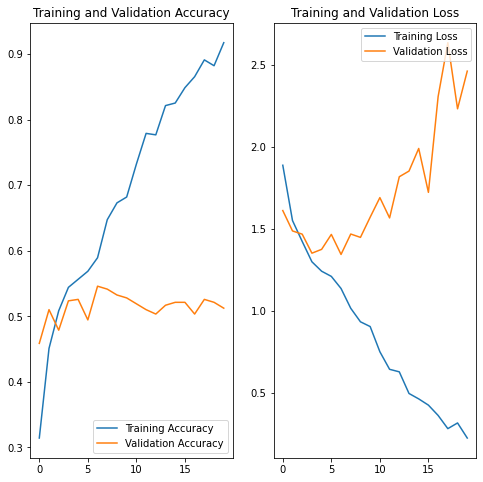

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here 

### Observation 
- our model is overfitting. since validation accuracy is much lower than the traning accuracy.

---------------------------------------

In [17]:
#Todo, after you have analysed the model fit history for presence of underfit or overfit, 
#choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

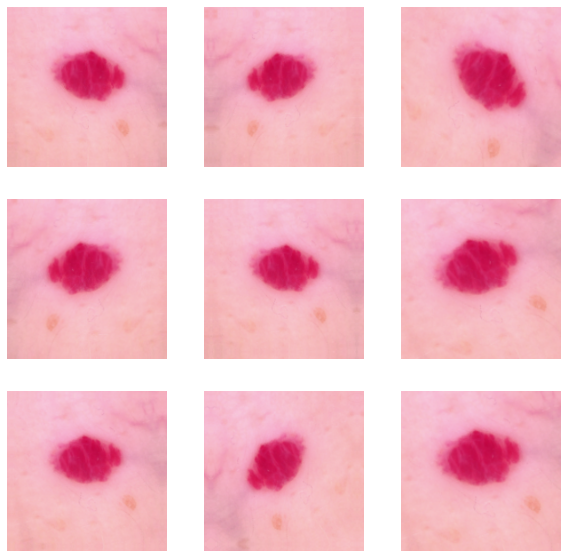

In [18]:
# # Todo, visualize how your augmentation strategy works for one instance of training image.
# # Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
#using drop out layers

## Your code goes here
model_1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [20]:
## Your code goes here
model_1.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
model_1.build((32,180,180,3))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 43, 43, 32)       

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 51ms/step - loss: 2.1320 - accuracy: 0.2013 - val_loss: 1.8582 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 1.8118 - accuracy: 0.3582 - val_loss: 1.6145 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.6073 - accuracy: 0.4194 - val_loss: 1.5544 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.5457 - accuracy: 0.4433 - val_loss: 1.4774 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.4252 - accuracy: 0.4943 - val_loss: 1.4610 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3754 - accuracy: 0.5182 - val_loss: 1.4104 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3288 - accuracy: 0.5435 - val_loss: 1.3876 - val_accuracy: 0.5190
Epoch 8/20
56

### Visualizing the results

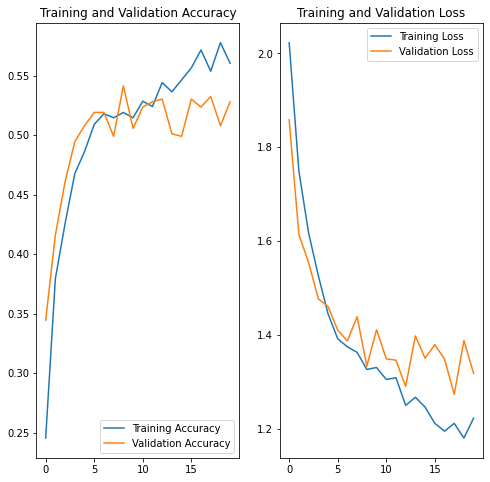

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Observation 

- yes, there is some improvement now as comapred to the previous run, now our model is not overfitting. However, we can experiment further and improve the model accuracy more.since model accuracy on traning data set and validation data set is low around 55 % to 60%. In other words we can say that model is underfitting.

------------------------

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
# creating a funation to get the data disrtibution
def dataset_distribution(img_folder):
  class_count = []
  class_name=[]
  for dir1 in os.listdir(img_folder):
    number_of_images_in_subfolder = len(os.listdir(os.path.join(img_folder, dir1)))
    class_name.append(dir1)
    class_count.append(number_of_images_in_subfolder)
  return tuple(zip(class_name, class_count))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


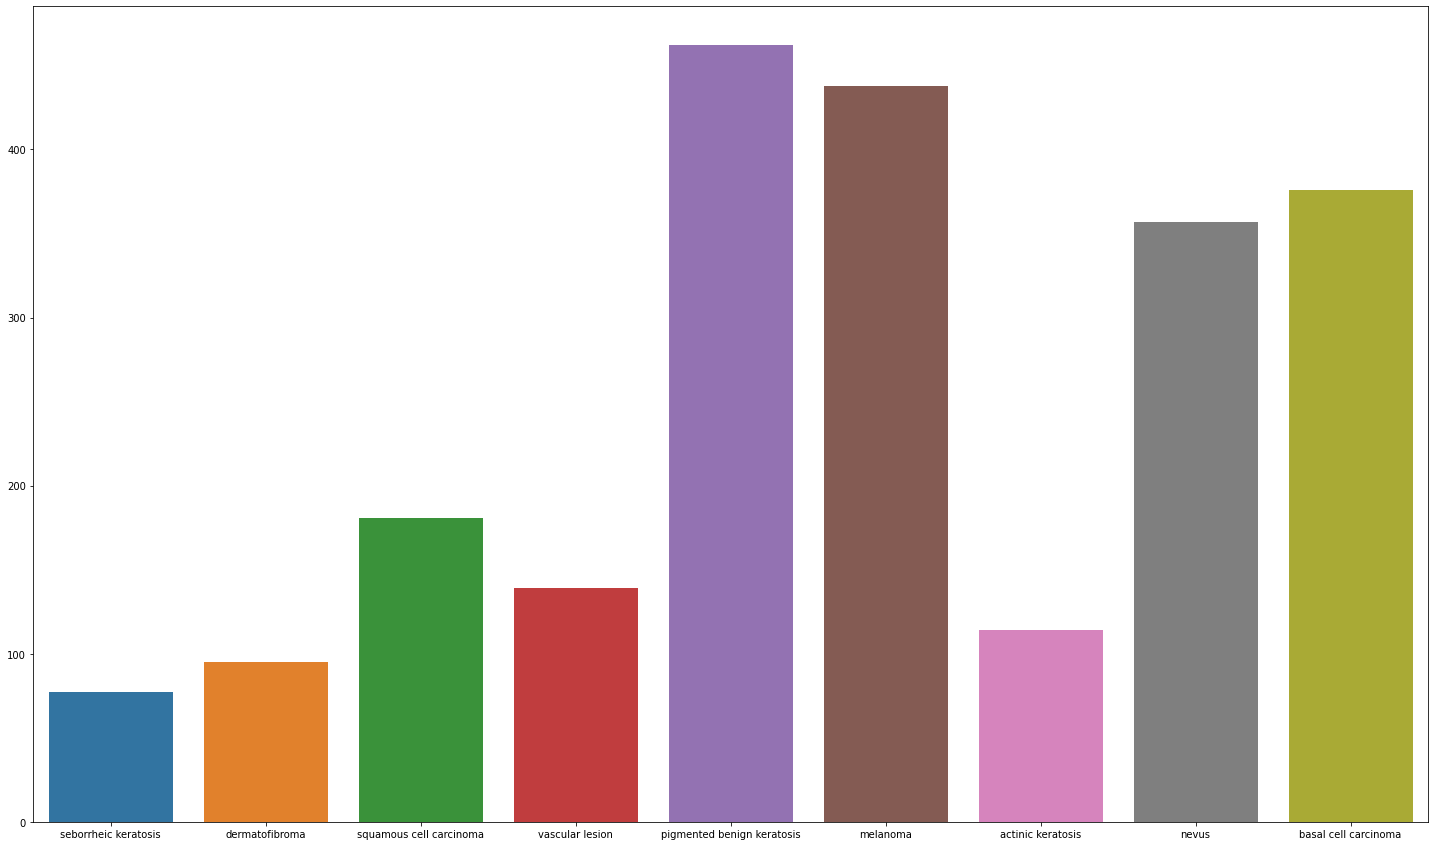

In [25]:
# drawing the distribution
import seaborn as sns
class_distribution = dataset_distribution(data_dir_train)
labels = [x[0] for x in class_distribution]
label_counts = [x[1] for x in class_distribution]

# df = pd.DataFrame(data=label_counts, columns=labels)
# sns.barplot(df)
plt.figure(figsize=(25,15))
sns.barplot(labels, label_counts)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


### Observations:-

- Seborrheic Keratosis class has the least number of smaples.

- pigmented benign keratosis class has maximum number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset.joinpath(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD1EC6C6310>: 100%|██████████| 500/500 [00:22<00:00, 22.55 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD1F024FD10>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1EC65A510>: 100%|██████████| 500/500 [00:22<00:00, 22.63 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1EC6C6490>:   0%|          | 1/500 [00:00<01:08,  7.31 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1F088E910>: 100%|██████████| 500/500 [00:23<00:00, 21.66 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD1F08D9C10>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2565x2000 at 0x7FD1EC6CA9D0>: 100%|██████████| 500/500 [01:41<00:00,  4.91 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD1EC6E3110>:   0%|          | 1/500 [00:00<01:36,  5.18 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1F08E16D0>: 100%|██████████| 500/500 [00:22<00:00, 22.08 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD1F10FA890>: 100%|██████████| 500/500 [00:49<00:00, 10.13 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD2A949F390>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Set/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD1EC6AE0D0>: 100%|██████████| 500/500 [00:22<00:00, 21.98 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0:4]

['/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011095.jpg_378c7ab8-9ad0-4b5b-a33a-c5267803b2c1.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011012.jpg_d1c52d46-eec2-4954-8115-6b1d2c9d78da.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010872.jpg_4ae98c6f-5c95-4657-be55-97d55091847a.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010909.jpg_eee55c59-19ca-4212-a7f8-c26b1e38ac8a.jpg']

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:4]

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis']

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
1,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
2,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
3,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
4,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
4496,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
4497,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
4498,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma


In [33]:
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_original[0:4]

['/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/ISIC_0010909.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/ISIC_0010923.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/ISIC_0010862.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Set/Train/seborrheic keratosis/ISIC_0010912.jpg']

In [34]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original[0:4]

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis']

In [35]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [36]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
1,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
2,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
3,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
4,/content/gdrive/MyDrive/Skin_Data_Set/Train/se...,seborrheic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
2235,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
2236,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma
2237,/content/gdrive/MyDrive/Skin_Data_Set/Train/ba...,basal cell carcinoma


In [37]:
new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## your code goes here
# creating a model with BatchNormalization and dropouts.
model_2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape=(180, 180, 3)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=2, strides=2),
  #layers.Dropout(0.25),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dropout(0.50),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here
model_2.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:
## Your code goes here, using 30 epochs

epochs = 30
history = model_2.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 58s 326ms/step - loss: 3.9079 - accuracy: 0.1701 - val_loss: 16.0887 - val_accuracy: 0.1084
Epoch 2/30
169/169 [==============================] - 54s 310ms/step - loss: 2.1807 - accuracy: 0.1582 - val_loss: 10.0974 - val_accuracy: 0.2339
Epoch 3/30
169/169 [==============================] - 52s 302ms/step - loss: 2.0960 - accuracy: 0.1818 - val_loss: 5.0021 - val_accuracy: 0.1537
Epoch 4/30
169/169 [==============================] - 52s 299ms/step - loss: 2.0686 - accuracy: 0.1901 - val_loss: 2.4511 - val_accuracy: 0.1767
Epoch 5/30
169/169 [==============================] - 53s 305ms/step - loss: 2.0646 - accuracy: 0.1964 - val_loss: 2.1077 - val_accuracy: 0.1863
Epoch 6/30
169/169 [==============================] - 54s 310ms/step - loss: 2.0693 - accuracy: 0.1840 - val_loss: 10.3706 - val_accuracy: 0.1752
Epoch 7/30
169/169 [==============================] - 55s 316ms/step - loss: 2.0390 - accuracy: 0.1961 - val_loss: 2.0504 - val

#### **Todo:**  Visualize the model results

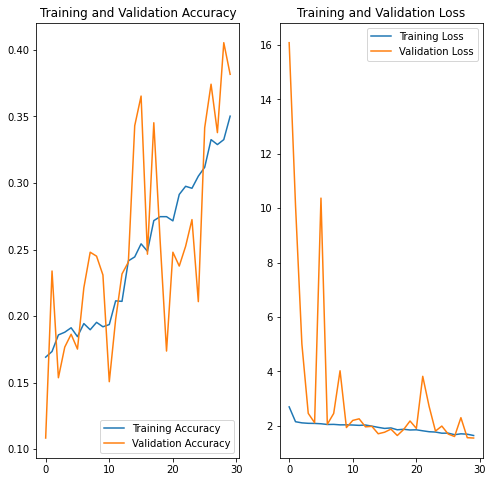

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- Model with BatchNormalization and dropouts does not give better result in this case. the model is not learning at all.

### Experimenting with model to get more accuracy, now creating a model with out Batch Normalization and with Droupout.

In [46]:
## your code goes here
# creating a model to get more accuracy, now creating a model with out Batch Normalization and with Droupout.

model_withoutBN_withDropOut = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D(pool_size=2, strides=2),
  #layers.Dropout(0.25),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  layers.MaxPooling2D(pool_size=2, strides=2),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  #layers.Dropout(0.50),
  layers.Dense(num_classes,activation='softmax')
])

In [47]:
## your code goes here, compiling the model
model_withoutBN_withDropOut.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
## Your code goes here, use 50 epochs. 
#using 50 epochs with callback(early stopping) implemented. 
#so that our model will not get overfitted.
# fitting/traning the model
epochs = 50
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
history = model_withoutBN_withDropOut.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs,callbacks=my_callbacks
)

Epoch 1/50
169/169 [==============================] - 51s 291ms/step - loss: 2.2149 - accuracy: 0.1903 - val_loss: 1.6721 - val_accuracy: 0.3445
Epoch 2/50
169/169 [==============================] - 51s 293ms/step - loss: 1.5328 - accuracy: 0.4156 - val_loss: 1.3795 - val_accuracy: 0.4855
Epoch 3/50
169/169 [==============================] - 51s 293ms/step - loss: 1.3326 - accuracy: 0.4948 - val_loss: 1.2366 - val_accuracy: 0.5412
Epoch 4/50
169/169 [==============================] - 52s 298ms/step - loss: 1.1995 - accuracy: 0.5639 - val_loss: 1.1713 - val_accuracy: 0.5486
Epoch 5/50
169/169 [==============================] - 52s 301ms/step - loss: 1.0569 - accuracy: 0.6181 - val_loss: 1.0350 - val_accuracy: 0.6140
Epoch 6/50
169/169 [==============================] - 53s 305ms/step - loss: 0.9396 - accuracy: 0.6579 - val_loss: 0.9988 - val_accuracy: 0.6399
Epoch 7/50
169/169 [==============================] - 53s 307ms/step - loss: 0.7642 - accuracy: 0.7262 - val_loss: 1.0005 - val_ac

Text(0.5, 1.0, 'Loss and Validation Loss')

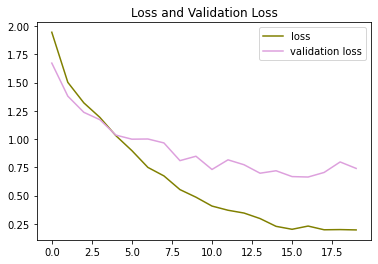

In [49]:
# Plotting train loss and validation loss
plt.figure()
plt.plot(history.history['loss'],color="olive", label='loss')
plt.plot(history.history['val_loss'], color="plum", label='validation loss')
plt.legend(loc='best')
plt.title(label="Loss and Validation Loss")

Text(0.5, 1.0, 'Accuracy and Validation Accuracy')

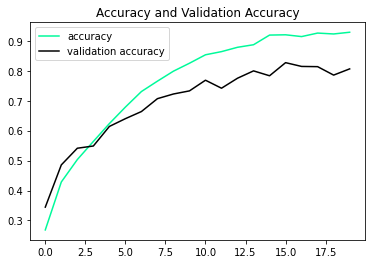

In [50]:
# Plotting train accuracy and validation accuracy

plt.figure()
plt.plot(history.history['accuracy'],color="mediumspringgreen", label='accuracy')
plt.plot(history.history['val_accuracy'], color="black", label='validation accuracy')
plt.legend(loc='best')
plt.title(label="Accuracy and Validation Accuracy")

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?




### Observation 
- Yes, class rebalance helped us to get the better accuracy than previos models. after using class rebalance (creating more data set)our model is netiher overfitting nor underfitting. since the difference between Traning accuracy and validation accuracy is not higher as compared to other models. now we are getting the Traning accuracy approx 90% and validation accuracy 80%.

## Conclusion

- Once we had rebalanced the class The model with drououts and without batch normalaization is giving better accuracy as compared to other models.